# Problem: 

# In an MCQ test, there are 20 questions each with four options. To pass the test, a student needs to give at least 10 correct answers. Calculate the probability that a student is successful even if s/he does not know any answer (i.e., on mere guesswork!). Please note that, all Questions are mandatory and there is no negative marking.

# Solution:

## Using Binomial Distribution

In [1]:
from scipy.stats import binom
theoritical_probability = 1 - binom.cdf(9,20,0.25)
print('The required probability is: %.3f'%theoritical_probability)

The required probability is: 0.014


## Using Probability Convergence

In [2]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class Question_set:
    def __init__(self,number_of_questions, number_of_options):
        self.number_of_qs = number_of_questions
        self.number_of_opts = number_of_options
    def Model_Answers(self):
        ans_dict = {}
        for i in range(self.number_of_qs):
            ans_dict[f'Q.{i+1}'] = random.randint(1, self.number_of_opts)
        return ans_dict
class Student(Question_set):
    def __init__(self, question_paper):
        self.number_of_qs = question_paper.number_of_qs
        self.number_of_opts = question_paper.number_of_opts
    def Given_Responses(self):
        resp_dict = {}
        for i in range(self.number_of_qs):
            resp_dict[f'Q.{i+1}'] = random.randint(1, self.number_of_opts)
        return resp_dict
    def Score(self):
        score = 0
        for i in (self.Model_Answers()).keys():
            if (self.Given_Responses())[i] == (self.Model_Answers())[i]:
                score+=1
        return score

In [4]:
A = Question_set(20,4)

In [5]:
def probability_of_passing(question_paper = A, number_of_students = 100, pass_marks = 10):
    pass_count = 0
    for i in range(number_of_students):
        stud = Student(question_paper)
        if stud.Score() >= pass_marks:
            pass_count+=1
    return pass_count/number_of_students

In [6]:
observed_probability = probability_of_passing(number_of_students = 1000)
print(f'The required probability is: {observed_probability}')

The required probability is: 0.014


# Graphical Representation of Convergence

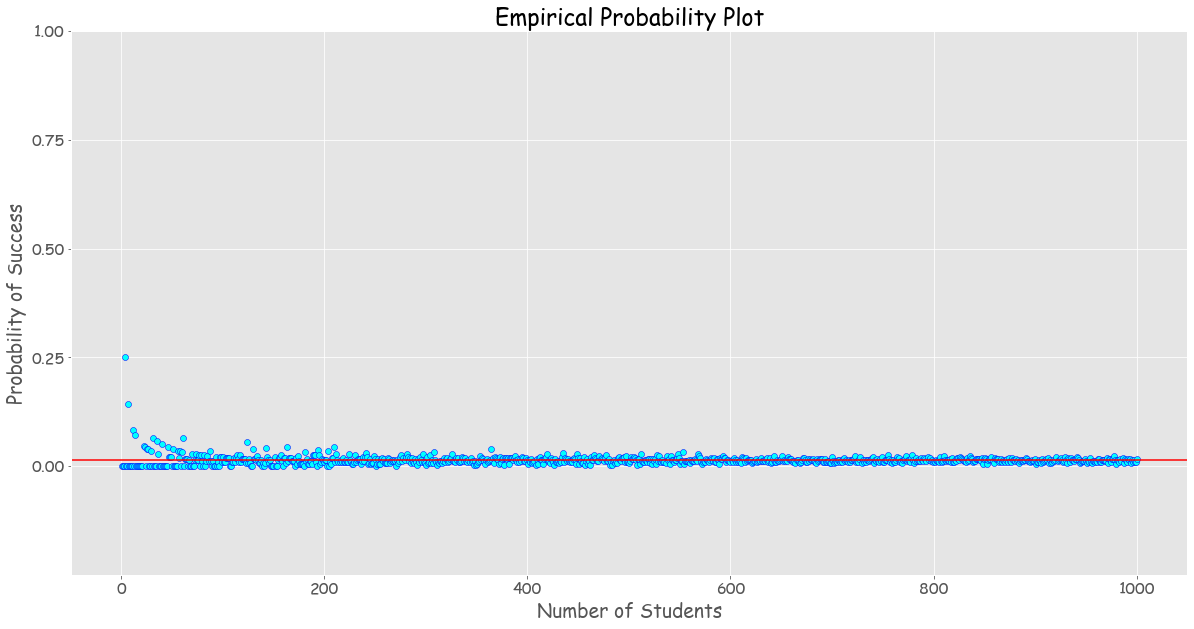

In [7]:
prob_ls = [probability_of_passing(number_of_students = i) for i in range(1,1000+1)]
plt.figure(figsize = (20,10))
plt.style.use('ggplot')
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']='Comic Sans MS'
plt.rcParams['font.size']=16
plt.scatter(range(1,1000+1),prob_ls, c = 'cyan', edgecolors = 'blue')
plt.axhline(y = theoritical_probability, color = 'r')
plt.ylim(-0.25,1)
plt.yticks([0.00,0.25,0.50,0.75,1.00])
plt.title("Empirical Probability Plot")
plt.xlabel('Number of Students')
plt.ylabel('Probability of Success')
plt.show()